In [114]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("Solarize_Light2")

data = pd.read_csv("/home/jeff/TTVP/data/USvideos.csv")

In [115]:
# Stats
print(f"Number of rows: {len(data)}")
mv = data.loc[:, "views"].mean()
median_v = data.loc[:, "views"].median()
print(f"Average views: {mv}")
print(f"Median views: {median_v}")

Number of rows: 40949
Average views: 2360784.6382573447
Median views: 681861.0


In [116]:
# process trending_date and publish_time
data["trending_date"] = "20" + data["trending_date"].str.replace(".", "/")
data["trending_date"] = pd.to_datetime(data["trending_date"], format="%Y/%d/%m")
data["publish_time"] = data["publish_time"].astype(str).str.slice(0, 10)
data["publish_time"] = pd.to_datetime(data["publish_time"], infer_datetime_format=True)

/tmp/ipykernel_100242/1844957573.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["trending_date"] = "20" + data["trending_date"].str.replace(".", "/")


In [117]:
# add date_diff column
data["date_diff"] = (data["trending_date"] - data["publish_time"]).dt.days

In [118]:
# remove duplicate videos but keep the last trending
data.sort_values(by="date_diff", inplace=True)
data.dropna(subset="views")
data = data.drop_duplicates(subset="video_id", keep="last")

In [119]:
# Preprocessing
data = data.loc[data["video_error_or_removed"] == False]
data["video_link"] = "https://www.youtube.com/watch?v=" + data["video_id"]
data = data.loc[~((data["likes"] == 0) & (data["ratings_disabled"] == False))]
print(f"Number of rows: {len(data)}")

Number of rows: 6345


In [120]:
data.to_csv("/home/jeff/TTVP/data/usvideos_rm_dup.csv")

Text(0, 0.5, 'Count')

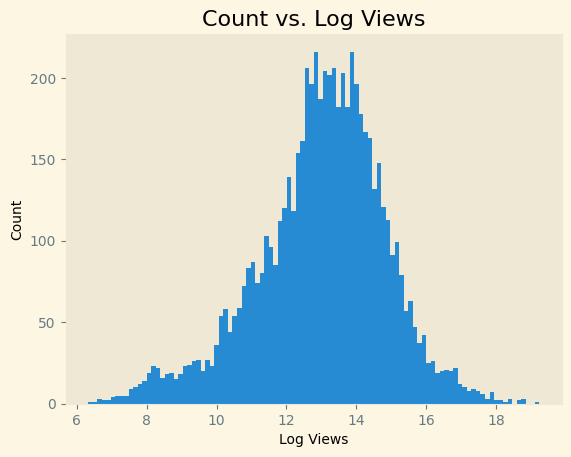

In [121]:
# Views
data["log views"] = np.log(data["views"])
data["log views"].hist(grid=False, bins=100)
plt.title("Count vs. Log Views")
plt.xlabel("Log Views")
plt.ylabel("Count")

Text(0.5, 0, 'Date Difference')

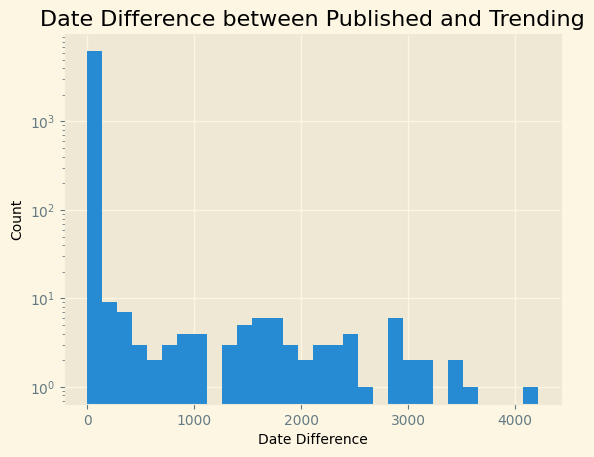

In [122]:
fig = plt.hist(data["date_diff"], log=True, bins=30)
plt.title("Date Difference between Published and Trending")
plt.ylabel("Count")
plt.xlabel("Date Difference")

/tmp/ipykernel_100242/2313144958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  views1.loc[:, "views"] = np.log(views1["views"])
/tmp/ipykernel_100242/2313144958.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  views2.loc[:, "views"] = np.log(views2["views"])
/tmp/ipykernel_100242/2313144958.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

342 288 307 344 644 984 3367


<Axes: >

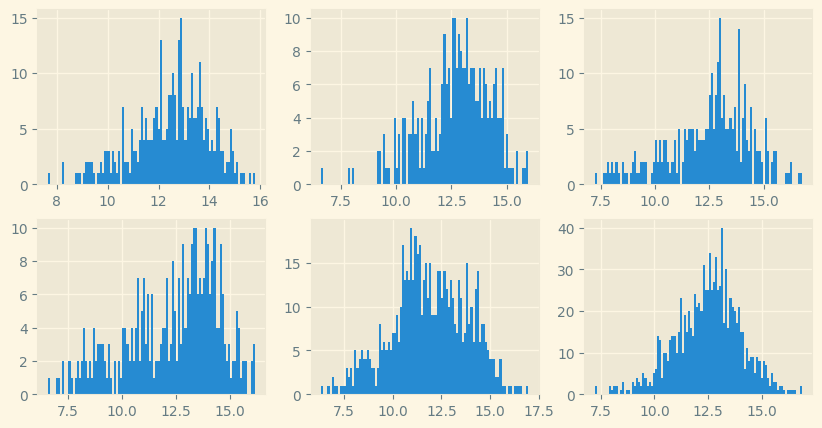

In [125]:
views1 = data.loc[data["date_diff"] <= 1]
views1.loc[:, "views"] = np.log(views1["views"])

views2 = data.loc[(data["date_diff"] > 1) & (data["date_diff"] <= 2)] # 
views2.loc[:, "views"] = np.log(views2["views"])

views3 = data.loc[(data["date_diff"] > 2) & (data["date_diff"] <= 3)] #  
views3.loc[:, "views"] = np.log(views3["views"])

views4 = data.loc[(data["date_diff"] > 3) & (data["date_diff"] <= 4)] # 
views4.loc[:, "views"] = np.log(views4["views"])

views5 = data.loc[(data["date_diff"] > 4) & (data["date_diff"] <= 5)] 
views5.loc[:, "views"] = np.log(views5["views"])

views6 = data.loc[(data["date_diff"] > 5) & (data["date_diff"] <= 6)]
views6.loc[:,"views"] = np.log(views6["views"])

views7 = data.loc[(data["date_diff"] > 6) & (data["date_diff"] <= 365)]

print(
    len(views1),
    len(views2),
    len(views3),
    len(views4),
    len(views5),
    len(views6),
    len(views7)
)
fig, axes = plt.subplots(nrows=2, ncols=3)
views1["views"].hist(ax=axes[0,0], figsize=(10,5), bins=100)
views2["views"].hist(ax=axes[0,1], figsize=(10,5), bins=100)
views3["views"].hist(ax=axes[0,2], figsize=(10,5), bins=100)
views4["views"].hist(ax=axes[1,0], figsize=(10,5), bins=100)
views5["views"].hist(ax=axes[1,1], figsize=(10,5), bins=100)
views6["views"].hist(ax=axes[1,2], figsize=(10,5), bins=100)

1925 1963 2033 424


(array([  2.,   0.,   1.,   4.,   5.,   5.,   3.,   4.,   7.,   7.,  10.,
         11.,  10.,  22.,  34.,  25.,  27.,  54.,  37.,  49.,  65.,  53.,
         76.,  82.,  96., 115., 100., 117., 116., 109.,  99., 106.,  90.,
         69.,  62.,  52.,  57.,  42.,  44.,  20.,  22.,  16.,   9.,   3.,
          9.,   3.,   4.,   3.,   1.,   6.]),
 array([ 7.22256602,  7.43062107,  7.63867612,  7.84673117,  8.05478622,
         8.26284127,  8.47089632,  8.67895137,  8.88700642,  9.09506147,
         9.30311652,  9.51117157,  9.71922662,  9.92728167, 10.13533672,
        10.34339178, 10.55144683, 10.75950188, 10.96755693, 11.17561198,
        11.38366703, 11.59172208, 11.79977713, 12.00783218, 12.21588723,
        12.42394228, 12.63199733, 12.84005238, 13.04810743, 13.25616248,
        13.46421753, 13.67227258, 13.88032763, 14.08838268, 14.29643773,
        14.50449278, 14.71254783, 14.92060288, 15.12865793, 15.33671299,
        15.54476804, 15.75282309, 15.96087814, 16.16893319, 16.37698824,
 

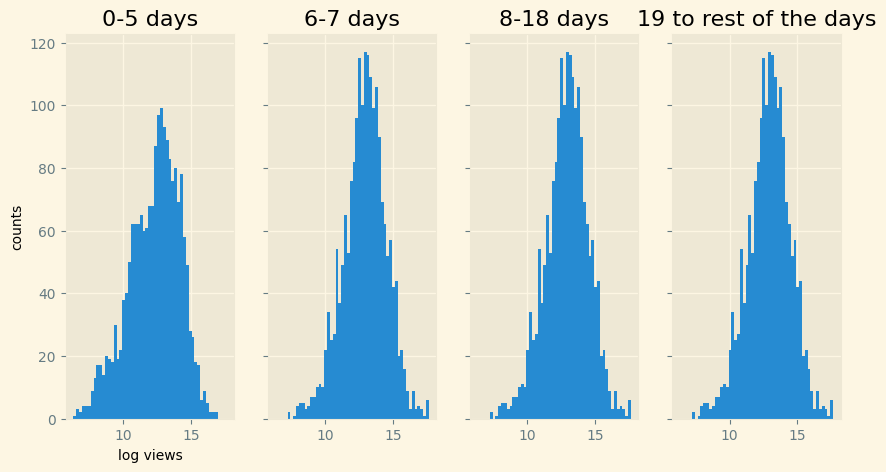

In [171]:
import scipy.stats as stat

fp = data.loc[data["date_diff"] <= 5]["views"].apply(lambda x: np.log(x))
sp = data.loc[(data["date_diff"] > 5) & (data["date_diff"] <= 7)]["views"].apply(lambda x: np.log(x))
tp = data.loc[(data["date_diff"] > 7) & (data["date_diff"] <= 18)]["views"].apply(lambda x: np.log(x))
fop = data.loc[(data["date_diff"] > 18)]["views"].apply(lambda x: np.log(x))
print(len(fp), len(sp), len(tp), len(fop))

fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True, figsize=(10, 5))

axes[0].set_title("0-5 days")
axes[0].set_xlabel("log views")
axes[0].set_ylabel("counts")
axes[0].hist(fp, bins=50)

axes[1].set_title("6-7 days")
axes[1].hist(sp, bins=50)

axes[2].set_title("8-18 days")
axes[2].hist(sp, bins=50)

axes[3].set_title("19 to rest of the days")
axes[3].hist(sp, bins=50)

In [164]:
print(stat.kstest(fp, sp).pvalue,
      stat.kstest(sp, tp).pvalue,
      stat.kstest(tp, fop).pvalue)

7.660911733597105e-18 3.9030936479410255e-35 1.866024571462969e-10
